# Visualizing Magnetic Fields with Mayavi
This is a demo notebook to test out the visualization capabilities of Mayavi.

This example comes from http://docs.enthought.com/mayavi/mayavi/auto/example_magnetic_field_lines.html, courtesy of Gael Varoquaux.

In [26]:
import numpy as np
from scipy import special
from mayavi import mlab
import matplotlib.pyplot as plt
%matplotlib inline

First, calculate the field.

In [27]:
radius = 1

In [28]:
x,y,z = [e.astype(np.float32) for e in np.ogrid[-10:10:150j,-10:10:150j,-10:10:150j]]

Express the coordinates in polar form.

In [29]:
rho = np.sqrt(x**2+y**2)
x_proj = x/rho
y_proj = y/rho

Free some memory.

Calculate some elliptic integrals with `scipy` to find the field analytically.

Complete elliptic integral of the second and first kind.

In [30]:
E = special.ellipe((4*radius*rho)/((radius+rho)**2 + z**2))
K = special.ellipk((4*radius*rho)/((radius+rho)**2 + z**2))

Calculate $B_z$ and $B_{\rho}$.

In [31]:
Bz = 1./np.sqrt((radius+rho)**2+z**2)*(K+E*(radius**2-rho**2-z**2)/((radius-rho)**2+z**2))

In [32]:
Brho = z/(rho*np.sqrt((radius+rho)**2 + z**2))*(-K + E*(radius**2+rho**2+z**2)/((radius-rho)**2+z**2))

Free up some more memory.

Get the $B_x$ and $B_y$ components.

In [33]:
Bx = x_proj*Brho
By = y_proj*Brho

And some more memory...

Try plotting the 2D vector field in matplotlib

In [44]:
np.shape(Bx)

(150, 150, 150)

(-10, 10)

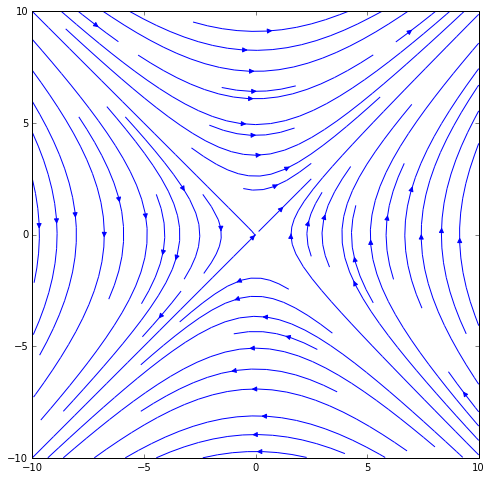

In [50]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.streamplot(x[:,0,0],y[0,:,0],Bx[:,:,149],By[:,:,149])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

Now that we've calculated $\mathbf{B}$, let's visualize it.

In [12]:
fig = mlab.figure(1,size=(400,400),
                  bgcolor=(1,1,1),
                 fgcolor=(0,0,0))

Calculate the vector field and the norm.

In [19]:
field = mlab.pipeline.vector_field(Bx,By,Bz)
magnitude = mlab.pipeline.extract_vector_norm(field)

Get the contours.

In [20]:
contours = mlab.pipeline.iso_surface(magnitude,
                                        contours=[0.01, 0.8, 3.8, ],
                                        transparent=True,
                                        opacity=0.4,
                                        colormap='YlGnBu',
                                        vmin=0, vmax=2)

and finally the **streamlines**...

In [21]:
field_lines = mlab.pipeline.streamline(magnitude, seedtype='line',
                                        integration_direction='both',
                                        colormap='bone',
                                        vmin=0, vmax=1)

In [22]:
field_lines.stream_tracer.maximum_propagation = 500.
field_lines.seed.widget.point1 = [69, 75.5, 75.5]
field_lines.seed.widget.point2 = [82, 75.5, 75.5]
field_lines.seed.widget.resolution = 100
field_lines.seed.widget.enabled = False

Show everything.

In [23]:
mlab.view(42, 73, 104, [79,  75,  76])
mlab.show()